# Praktek TF-IDF

**Restu Lestari Mulianingrum (A11.2022.14668)**

In [5]:
import pandas as pd
import numpy as np

In [6]:
dataset = pd.read_csv('appstore_instagram_reviews_anonymized.csv')

In [7]:
dataset_feature=dataset['text'].astype(str)

In [8]:
dataset_feature

0      When I want to share any stories, posts or ree...
1      I have been using the app for a week now. I ca...
2      Instagram, was ist nur mit euch los? Es ist fr...
3       Die neue Schriftart ist so unglaublich hässlich.
4                          Null zufrieden darum gelöscht
                             ...                        
495    Not able to use music since update. I can’t ma...
496    My insta keeps glitching out and the notes are...
497    Ion appreciate how y’all took my notes on both...
498    I love this app, Although my algorithm isn’t t...
499    2 advertisements back to back per every 4-5 po...
Name: text, Length: 500, dtype: object

In [9]:
dataset.shape

(500, 11)

In [10]:
dataset

,appId,country,date,id,score,text,title,url,userName,userUrl,version
0,389801252,DE,2024-03-20T22:37:03-07:00,11067766035,1,"When I want to share any stories, posts or ree...",List of friends in weird order,https://itunes.apple.com/de/review?id=38980125...,988858b9f96ee718616ad5dc2496ff911ff86bd790caad...,https://itunes.apple.com/de/reviews/id159880897,323.0.0
1,389801252,DE,2024-03-20T22:17:05-07:00,11067726970,4,I have been using the app for a week now. I ca...,Great companion,https://itunes.apple.com/de/review?id=38980125...,06dfad50909f5bc85a0a4198d91da9e5d5ae9954e8bba6...,https://itunes.apple.com/de/reviews/id1333052389,323.0.0
2,389801252,DE,2024-03-20T16:08:40-07:00,11066866484,1,"Instagram, was ist nur mit euch los? Es ist fr...",#Instagram #Fehler #Verbesserung dringend nötig,https://itunes.apple.com/de/review?id=38980125...,4b8d13b92ce712f53651cb538b1c079daa782136547a20...,https://itunes.apple.com/de/reviews/id711608090,323.0.0
3,389801252,DE,2024-03-20T15:54:39-07:00,11066832683,1,Die neue Schriftart ist so unglaublich hässlich.,Hässliche Layout,https://itunes.apple.com/de/review?id=38980125...,52acf5c35b9fa5653f8fb7b9ab7ec305e0ead4f07708bc...,https://itunes.apple.com/de/reviews/id830638504,323.0.0
4,389801252,DE,2024-03-20T14:59:23-07:00,11066699753,1,Null zufrieden darum gelöscht,Instagram absoluter Müll geworden sorry aber e...,https://itunes.apple.com/de/review?id=38980125...,f31334bd164a58cffae342f04040b0f7cb2ad9416ed0b0...,https://itunes.apple.com/de/reviews/id1193916555,323.0.0
...,...,...,...,...,...,...,...,...,...,...,...
495,389801252,US,2024-03-20T10:15:45-07:00,11065969963,1,Not able to use music since update. I can’t ma...,broken update,https://itunes.apple.com/us/review?id=38980125...,fc9515e3c6cf290fe45251386d5070916358c65759e05a...,https://itunes.apple.com/us/reviews/id1497906061,323.0.0
496,389801252,US,2024-03-20T10:14:51-07:00,11065967408,4,My insta keeps glitching out and the notes are...,Notes??,https://itunes.apple.com/us/review?id=38980125...,d314e04ed703c3dafe206dcf4e73bd8ac4ed9ded79be68...,https://itunes.apple.com/us/reviews/id1369652389,323.0.0
497,389801252,US,2024-03-20T10:12:51-07:00,11065961530,1,Ion appreciate how y’all took my notes on both...,Instagram,https://itunes.apple.com/us/review?id=38980125...,d38ef2ab5f2fb0cdf4183c415f8e0bba9176ed031e9329...,https://itunes.apple.com/us/reviews/id1499593735,323.0.0
498,389801252,US,2024-03-20T10:03:08-07:00,11065933178,5,"I love this app, Although my algorithm isn’t t...",Instagram Algorithm,https://itunes.apple.com/us/review?id=38980125...,07cbdff3fc7a99a2ef468ccf4fd10b301f3216dd095de4...,https://itunes.apple.com/us/reviews/id1356468993,323.0.0


In [11]:
dataset_label = dataset['score']
dataset_label

0      1
1      4
2      1
3      1
4      1
      ..
495    1
496    4
497    1
498    5
499    1
Name: score, Length: 500, dtype: int64

## Cek Distribusi Score

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\RESTU\AppData\Local\Temp\ipykernel_48728\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


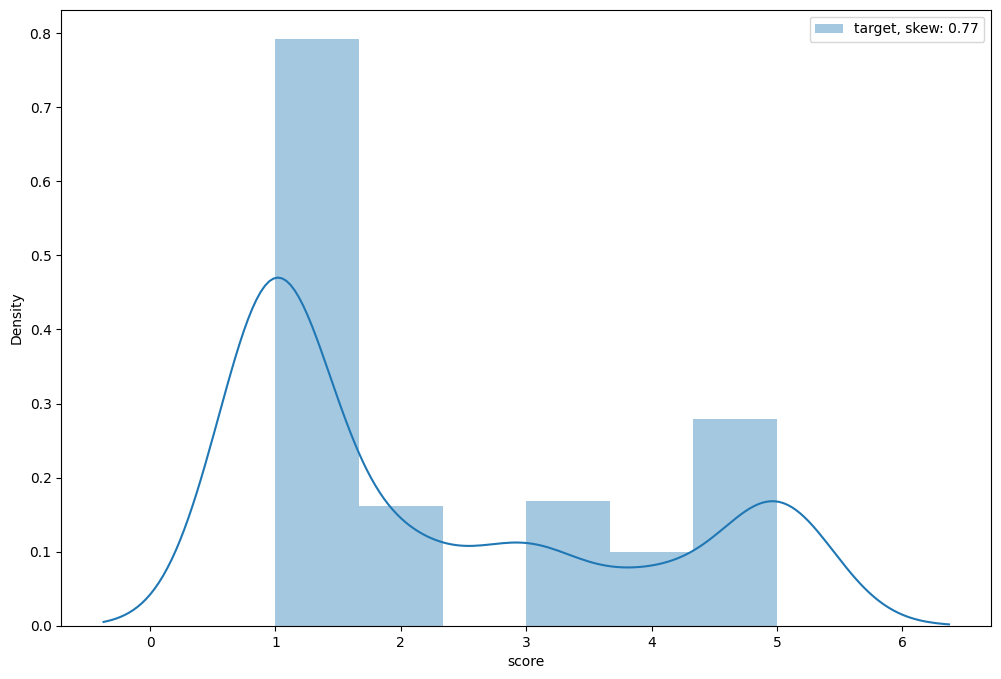

In [13]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [14]:
dataset_label.value_counts()

score
1    264
5     93
3     56
2     54
4     33
Name: count, dtype: int64

## TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer()

In [17]:
X = vectorizer.fit_transform(dataset_feature)

In [18]:
print(X.shape)

(500, 2944)


In [19]:
features = vectorizer.get_feature_names_out()

In [20]:
features

array(['01', '02', '03', ..., 'хрена', 'что', 'это'], dtype=object)

In [21]:
idfValues = vectorizer.idf_

In [22]:
d = dict(zip(features, 9 - idfValues))

In [23]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [24]:
for i in range(3867):
    print(sortedDict[i])

('the', 7.130501429632604)
('to', 7.071660929609671)
('and', 7.00374972399346)
('it', 6.913292613838209)
('my', 6.877144099721898)
('is', 6.8332499061646725)
('instagram', 6.681233698866047)
('app', 6.650928349370718)
('this', 6.5369840900215)
('on', 6.4655251260393545)
('of', 6.456222733377041)
('in', 6.41812288714477)
('not', 6.378513749049725)
('for', 6.337270790515676)
('but', 6.294253405431985)
('can', 6.237741195168643)
('have', 6.202234506711733)
('that', 6.140102725604727)
('with', 6.060060017931191)
('me', 5.973048640941561)
('so', 5.973048640941561)
('you', 5.926528625306668)
('was', 5.808745589650284)
('are', 5.753685812467257)
('or', 5.695416904343281)
('all', 5.6752141970257615)
('be', 5.633541500625194)
('like', 5.633541500625194)
('account', 5.61203529540423)
('update', 5.61203529540423)
('when', 5.61203529540423)
('from', 5.590056388685455)
('just', 5.590056388685455)
('back', 5.521063517198503)
('notes', 5.521063517198503)
('please', 5.521063517198503)
('an', 5.4969659

IndexError: list index out of range

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [25]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

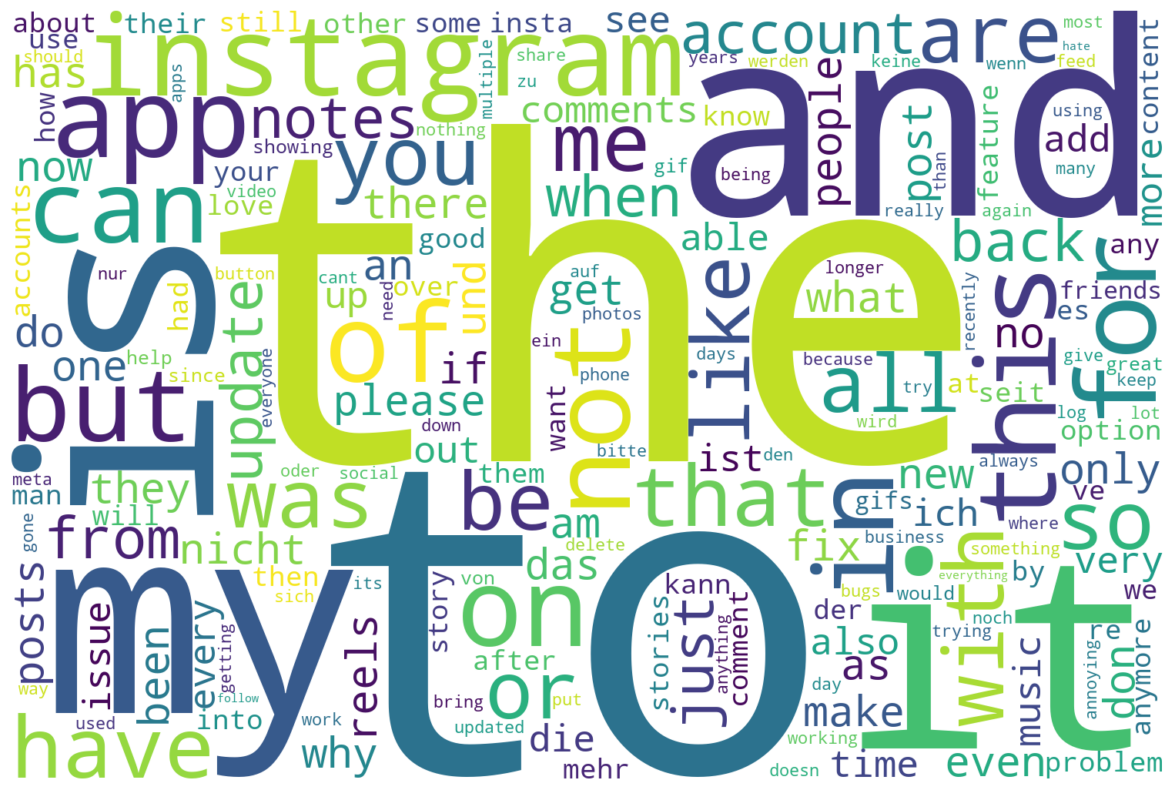

In [26]:
PlotWordCloud(d)